In [16]:
#Load Libraries and Datasets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

historical_df = pd.read_csv(r'C:\Users\ANISH\Downloads\historical_data.csv')
historical_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [5]:
sentiment_df = pd.read_csv(r'C:\Users\ANISH\Downloads\fear_greed_index.csv')
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [8]:
# Rename columns for consistency
historical_df.rename(columns={
    'Timestamp IST': 'datetime',
    'Closed PnL': 'closedPnL',
    'Side': 'side',
    'Execution Price': 'execution_price',
    'Size USD': 'size_usd',
    'Size Tokens': 'size_tokens',
    'Coin': 'symbol',
    'Account': 'account',
    'Timestamp': 'raw_timestamp'
}, inplace=True)

# Convert datetime
historical_df['datetime'] = pd.to_datetime(historical_df['datetime'], errors='coerce')
historical_df['date'] = historical_df['datetime'].dt.date

# Format sentiment data
sentiment_df.rename(columns={'classification': 'Classification'}, inplace=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date

# Merge datasets on date
merged_df = pd.merge(historical_df, sentiment_df[['date', 'Classification']], on='date', how='inner')


In [9]:
merged_df.isnull().sum()


account             0
symbol              0
execution_price     0
size_tokens         0
size_usd            0
side                0
datetime            0
Start Position      0
Direction           0
closedPnL           0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
raw_timestamp       0
date                0
Classification      0
dtype: int64

In [10]:
merged_df.groupby('Classification')['closedPnL'].describe()


,count,mean,std,min,25%,50%,75%,max
Classification,,,,,,,,
Extreme Fear,2326.0,1.891632,76.727713,-1430.889856,0.0,0.00000,0.298102,2020.000000
Extreme Greed,5621.0,205.816345,1861.557119,-18360.670070,0.0,0.96048,30.153710,44223.451870
Fear,13869.0,128.287950,1342.348497,-19841.240140,0.0,0.00000,8.201820,71535.716740
Greed,11292.0,53.988003,1399.468182,-117990.104100,0.0,0.00000,13.441364,34903.817100
Neutral,2756.0,27.088803,142.945889,-1032.981540,0.0,0.00000,9.267691,2979.554311


In [11]:
merged_df['profitable'] = merged_df['closedPnL'] > 0
merged_df.groupby('Classification')['profitable'].mean()



Classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: profitable, dtype: float64

In [12]:
merged_df.groupby(['Classification', 'side']).size().unstack()


side,BUY,SELL
Classification,,
Extreme Fear,1168,1158
Extreme Greed,1661,3960
Fear,7307,6562
Greed,5407,5885
Neutral,1020,1736


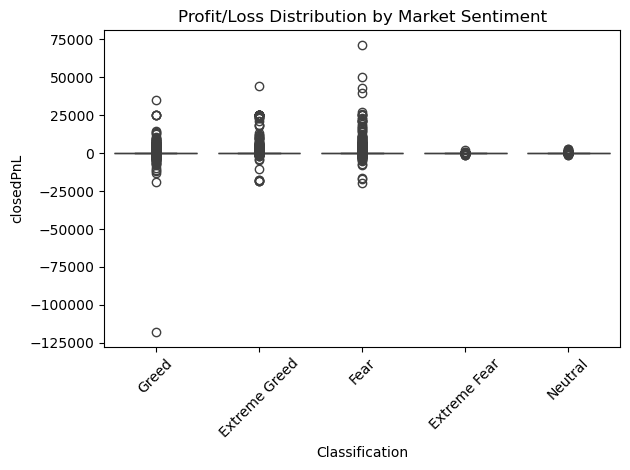

In [13]:
sns.boxplot(data=merged_df, x='Classification', y='closedPnL')
plt.title("Profit/Loss Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


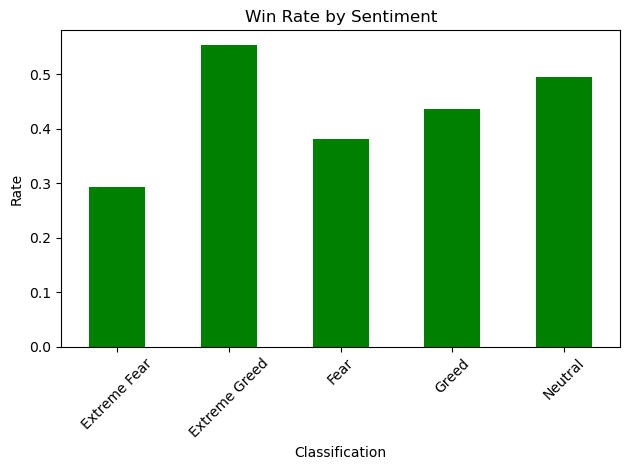

In [14]:
win_rate = merged_df.groupby('Classification')['profitable'].mean()
win_rate.plot(kind='bar', color='green')
plt.title("Win Rate by Sentiment")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


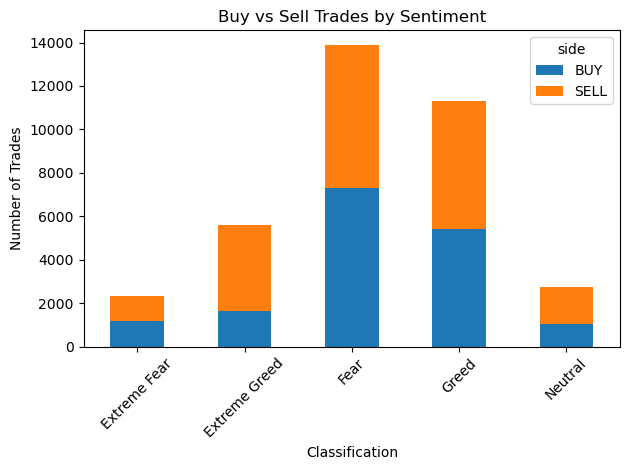

In [15]:
side_counts = merged_df.groupby(['Classification', 'side']).size().unstack()
side_counts.plot(kind='bar', stacked=True)
plt.title("Buy vs Sell Trades by Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
